# predict povrety using satelite images


## DATA 


notre data est composer d'image sattelite de l'ethiopie 

### data loading 

Nombre d'images chargées : 8587


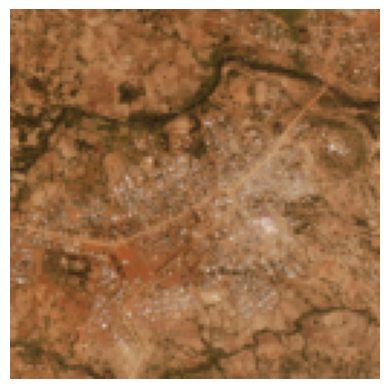

In [1]:
import cv2
import os
import matplotlib.pyplot as plt

# Chemin vers le dossier contenant les images
folder_path =  'images' 
 

# Liste pour stocker les images
images = []

# Lire chaque fichier dans le dossier
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        if image is not None:
            image_resized = cv2.resize(image, (128, 128))
            images.append(image_resized)

# Vérifier le nombre d'images chargées
print(f"Nombre d'images chargées : {len(images)}")

# Afficher la première image avec Matplotlib
if images:
    plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))  # Convertir de BGR à RGB pour l'affichage
    plt.axis('off')  # Masquer les axes
    plt.show()

### data-preprocesing

In [2]:
import numpy as np
# Convert images list to numpy array and normalize
images_array = np.array(images, dtype=np.float32) / 255.0  # Normalize to [0, 1]

In [3]:
print(images_array)

[[[[0.26666668 0.4392157  0.654902  ]
   [0.25882354 0.43137255 0.64705884]
   [0.25490198 0.42352942 0.6431373 ]
   ...
   [0.27058825 0.42745098 0.60784316]
   [0.3254902  0.4745098  0.64705884]
   [0.20392157 0.36078432 0.5764706 ]]

  [[0.2627451  0.43529412 0.6313726 ]
   [0.27450982 0.44313726 0.654902  ]
   [0.24313726 0.41568628 0.627451  ]
   ...
   [0.21568628 0.38039216 0.5686275 ]
   [0.2901961  0.45490196 0.6392157 ]
   [0.2627451  0.41960785 0.64705884]]

  [[0.18431373 0.3529412  0.5254902 ]
   [0.2901961  0.45490196 0.6431373 ]
   [0.2509804  0.4117647  0.6117647 ]
   ...
   [0.2627451  0.43137255 0.65882355]
   [0.2627451  0.43137255 0.65882355]
   [0.21568628 0.37254903 0.627451  ]]

  ...

  [[0.2509804  0.42352942 0.63529414]
   [0.20784314 0.38039216 0.58431375]
   [0.18039216 0.34901962 0.54509807]
   ...
   [0.28627452 0.43137255 0.58431375]
   [0.3019608  0.45490196 0.6313726 ]
   [0.31764707 0.47843137 0.65882355]]

  [[0.2784314  0.44705883 0.654902  ]
   [0.2

## feature extraction

In [4]:
from tensorflow.keras.applications import VGG16

# Specify the path to the downloaded weights
weights_path = '/Users/yahiaelfirdoussi/Downloads/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Load the VGG16 model
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(128, 128, 3))


2024-11-12 19:46:41.701374: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
from tensorflow.keras.models import Model
# Extract features using VGG16
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)
features = model.predict(images_array, batch_size=32)
features_flat = features.reshape(features.shape[0], -1)  # Flatten features


269/269 ━━━━━━━━━━━━━━━━━━━━ 479s 2s/step


## clustering 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Image 1 is in cluster 1
Image 2 is in cluster 1
Image 3 is in cluster 0
Image 4 is in cluster 1
Image 5 is in cluster 1
Image 6 is in cluster 1
Image 7 is in cluster 1
Image 8 is in cluster 1
Image 9 is in cluster 1
Image 10 is in cluster 1
Image 11 is in cluster 1
Image 12 is in cluster 1
Image 13 is in cluster 0
Image 14 is in cluster 1
Image 15 is in cluster 1
Image 16 is in cluster 1
Image 17 is in cluster 1
Image 18 is in cluster 0
Image 19 is in cluster 0
Image 20 is in cluster 1
Image 21 is in cluster 1
Image 22 is in cluster 1
Image 23 is in cluster 1
Image 24 is in cluster 0
Image 25 is in cluster 0
Image 26 is in cluster 0
Image 27 is in cluster 1
Image 28 is in cluster 1
Image 29 is in cluster 1
Image 30 is in cluster 1
Image 31 is in cluster 1
Image 32 is in cluster 1
Image 33 is in cluster 1
Image 34 is in cluster 1
Image 35 is in cluster 1
Image 36 is in cluster 1
Image 37 is in cluster 1
Image 38 is in cluster 1
Image 39 is in cluster 1
Image 40 is in cluster 1
Image 41 

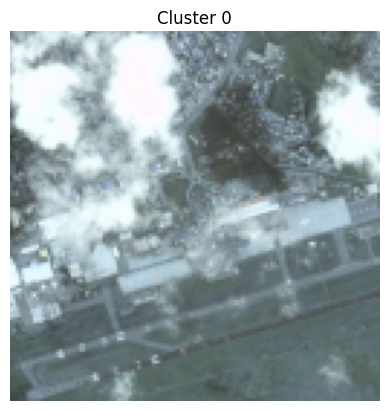

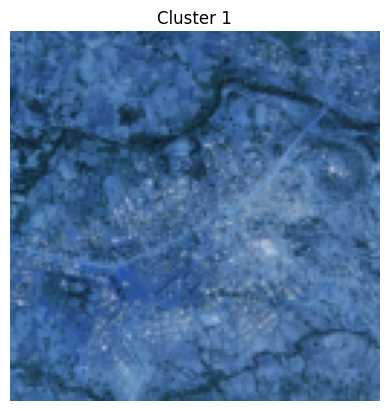

In [6]:
from sklearn.cluster import KMeans
# Perform K-Means clustering
num_clusters = 2  # Set the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features_flat)

# Add cluster information to images
for i, cluster in enumerate(clusters):
    print(f"Image {i+1} is in cluster {cluster}")

# Visualize one image from each cluster
for cluster_id in range(num_clusters):
    cluster_indices = np.where(clusters == cluster_id)[0]
    if cluster_indices.size > 0:
        plt.imshow(images_array[cluster_indices[0]])
        plt.title(f"Cluster {cluster_id}")
        plt.axis('off')
        plt.show()

In [7]:
# Save to a file
np.save('clusters.npy', clusters)


In [8]:
import pandas as pd
# Get a list of image filenames
image_filenames = [filename for filename in os.listdir(folder_path) if filename.endswith(('.jpg', '.png'))]

# Ensure the length of filenames matches the length of clusters
if len(image_filenames) != len(clusters):
    raise ValueError("Mismatch between the number of images and the cluster assignments.")

# Create a DataFrame with filenames and cluster assignments
data = pd.DataFrame({
    'Filename': image_filenames,
    'Cluster': clusters
})

# Save the DataFrame to a CSV file
output_file = 'clusters.csv'
data.to_csv(output_file, index=False)

print(f"Cluster assignments saved to {output_file}")

Cluster assignments saved to clusters.csv


Poorest cluster: 1
Richest cluster: 0
Examples from the poorest cluster:


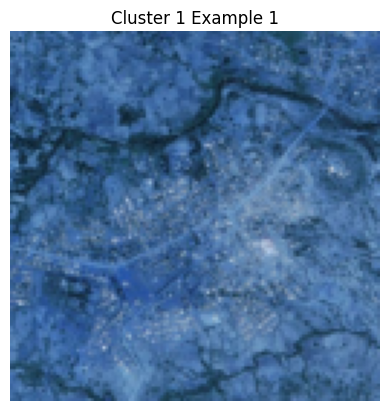

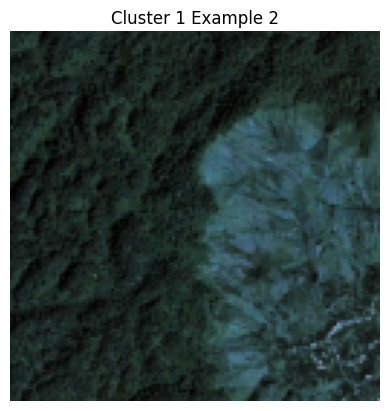

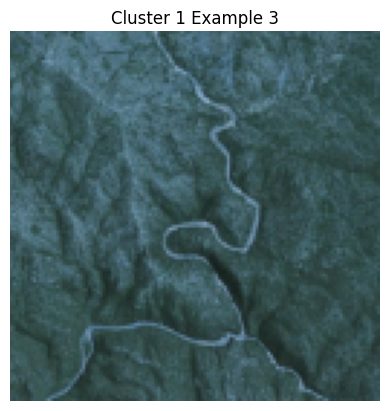

Examples from the richest cluster:


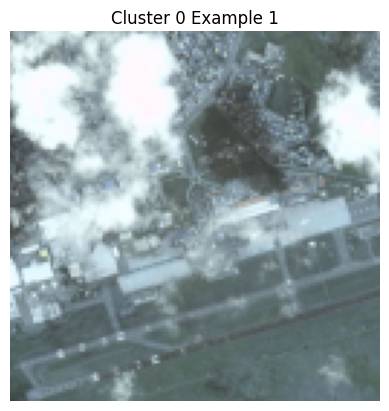

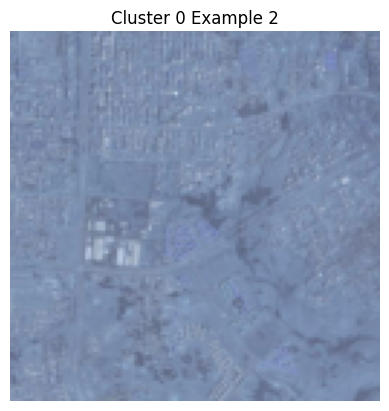

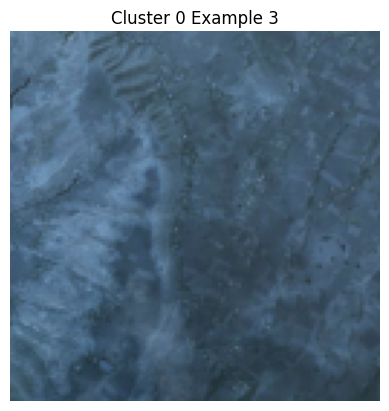

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

clusters = np.load('clusters.npy') # Cluster assignment for each image
num_clusters = len(set(clusters))  # Number of clusters


cluster_metrics = []

for cluster_id in range(num_clusters):
    # Get all images in the cluster
    cluster_indices = np.where(clusters == cluster_id)[0]
    cluster_images = images_array[cluster_indices]
    
    # Initialize metrics for the cluster
    building_density = []
    vegetation_index = []
    pixel_intensity = []
    
    for image in cluster_images:
        # Calculate building density using edge detection
        edges = cv2.Canny((image * 255).astype(np.uint8), 100, 200)
        building_density.append(np.sum(edges > 0))
        
        # Calculate NDVI (proxy for vegetation cover)
        ndvi = (image[:, :, 1] - image[:, :, 0]) / (image[:, :, 1] + image[:, :, 0] + 1e-6)
        vegetation_index.append(np.mean(ndvi))
        
        # Calculate average pixel intensity
        pixel_intensity.append(np.mean(image))
    
    # Aggregate metrics for the cluster
    cluster_metrics.append({
        "cluster_id": cluster_id,
        "avg_building_density": np.mean(building_density),
        "avg_vegetation_index": np.mean(vegetation_index),
        "avg_pixel_intensity": np.mean(pixel_intensity)
    })

# Convert metrics to a NumPy array for easy sorting
cluster_metrics_array = np.array([
    (metric["cluster_id"], metric["avg_building_density"], metric["avg_vegetation_index"], metric["avg_pixel_intensity"])
    for metric in cluster_metrics
])

# Define a score for poverty (lower scores -> poorer clusters)
# Higher building density and pixel intensity suggest wealth, higher NDVI suggests agriculture
scores = (
    1 / (cluster_metrics_array[:, 1] + 1e-6) +  # Inverse of building density
    1 / (cluster_metrics_array[:, 2] + 1e-6) +  # Inverse of vegetation index
    1 / (cluster_metrics_array[:, 3] + 1e-6)    # Inverse of pixel intensity
)

# Rank clusters by poverty scores
ranked_clusters = np.argsort(scores)

# Identify poor and rich clusters
poorest_cluster = ranked_clusters[0]
richest_cluster = ranked_clusters[-1]

print(f"Poorest cluster: {poorest_cluster}")
print(f"Richest cluster: {richest_cluster}")

# Optional: Visualize examples from poor and rich clusters
def visualize_cluster_images(cluster_id, num_examples=3):
    cluster_indices = np.where(clusters == cluster_id)[0]
    for i, idx in enumerate(cluster_indices[:num_examples]):
        plt.imshow(images_array[idx])
        plt.title(f"Cluster {cluster_id} Example {i+1}")
        plt.axis('off')
        plt.show()

# Visualize poorest cluster
print("Examples from the poorest cluster:")
visualize_cluster_images(poorest_cluster)

# Visualize richest cluster
print("Examples from the richest cluster:")
visualize_cluster_images(richest_cluster)


we defined the poor(cluster 1) and rich clusters (cluster 0)

## CNN for prediction

### data preparation


In [10]:

csv_file = 'clusters.csv'
image_folder = 'images'

# Read the CSV file
data = pd.read_csv(csv_file)

# Ensure the CSV file contains columns: 'Filename' and 'Label'
print(data.head())

# Extract filenames and labels
image_filenames = data['Filename'].values
labels = data['Cluster'].values


                                            Filename  Cluster
0  6.405587774114024_39.85032916309602_6.45050353...        1
1  6.91411343602_35.64529347130199_6.91411343602_...        1
2  8.974778920698009_38.80359729020398_8.98975084...        0
3  9.190851605836015_42.4952242973_9.220795448639...        1
4  8.496407131684023_39.28686091250199_8.54132289...        1


In [11]:
# Initialize list for images and labels
images = []
image_labels = []

# Loop through each filename and label
for filename, label in zip(image_filenames, labels):
    image_path = os.path.join(image_folder, filename)
    image = cv2.imread(image_path)
    if image is not None:
        # Resize image to 128x128 and normalize pixel values
        image_resized = cv2.resize(image, (128, 128)) / 255.0
        images.append(image_resized)
        image_labels.append(label)

# Convert lists to NumPy arrays
images_array = np.array(images, dtype=np.float32)
labels_array = np.array(image_labels)

print(f"Loaded {len(images_array)} images.")


Loaded 8587 images.


In [12]:
from tensorflow.keras.utils import to_categorical

# Get the number of unique labels
num_classes = len(np.unique(labels_array))

# Convert labels to one-hot encoding
labels_one_hot = to_categorical(labels_array, num_classes=num_classes)

print(f"One-hot encoded labels shape: {labels_one_hot.shape}")


One-hot encoded labels shape: (8587, 2)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp, filenames_train, filenames_temp = train_test_split(
    images_array, labels_one_hot, image_filenames, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test, filenames_val, filenames_test = train_test_split(
    X_temp, y_temp, filenames_temp, test_size=0.5, random_state=42
)

# Print dataset shapes for verification
print(f"Training set: {X_train.shape}, {y_train.shape}, {len(filenames_train)}")
print(f"Validation set: {X_val.shape}, {y_val.shape}, {len(filenames_val)}")
print(f"Test set: {X_test.shape}, {y_test.shape}, {len(filenames_test)}")

Training set: (6010, 128, 128, 3), (6010, 2), 6010
Validation set: (1288, 128, 128, 3), (1288, 2), 1288
Test set: (1289, 128, 128, 3), (1289, 2), 1289


### model building and compilation


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer for classification
])

model.summary()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.optimizers import SGD
# Compile with SGD
sgd = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=sgd,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

### model training 

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 69s 343ms/step - accuracy: 0.6230 - loss: 0.6438 - val_accuracy: 0.6087 - val_loss: 0.6365
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 69s 366ms/step - accuracy: 0.6472 - loss: 0.6097 - val_accuracy: 0.8370 - val_loss: 0.3933
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 64s 342ms/step - accuracy: 0.8193 - loss: 0.4099 - val_accuracy: 0.8408 - val_loss: 0.3439
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 63s 333ms/step - accuracy: 0.8893 - loss: 0.2816 - val_accuracy: 0.8610 - val_loss: 0.2976
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 64s 339ms/step - accuracy: 0.9002 - loss: 0.2455 - val_accuracy: 0.7935 - val_loss: 0.4924
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 62s 331ms/step - accuracy: 0.9072 - loss: 0.2325 - val_accuracy: 0.9286 - val_loss: 0.2020
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 62s 329ms/step - accuracy: 0.9411 - loss: 0.1539 - val_accuracy: 0.9425 - val_loss: 0.1778
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 62s 328ms/step - accuracy: 0.9408 - loss: 0

### model evaluation

In [18]:
from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model('best_model.keras')

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.9494 - loss: 0.1620
Test Loss: 0.1950, Test Accuracy: 0.9364


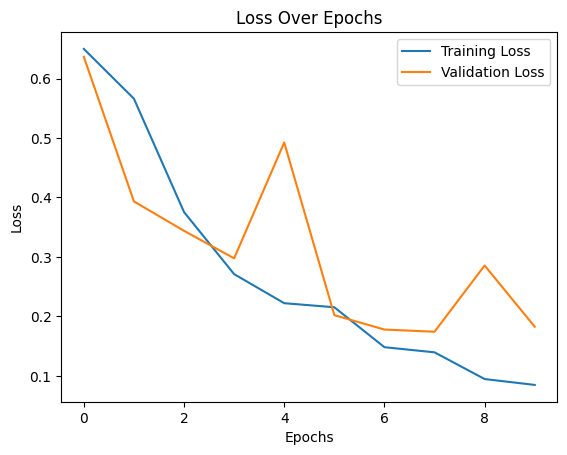

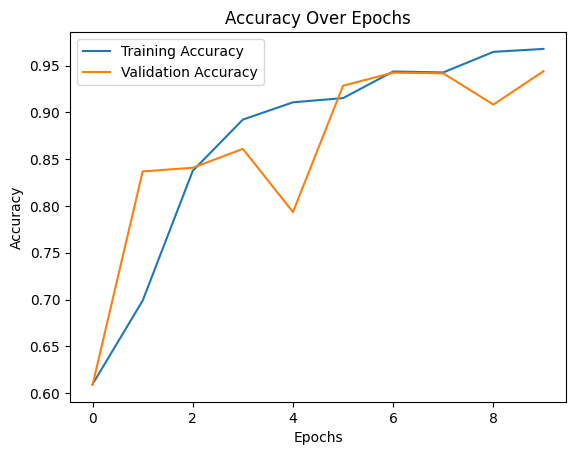

In [19]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
import numpy as np

# Load a single image for prediction
image_path = '/Users/yahiaelfirdoussi/Desktop/image_analisys/images/3.8642429801_39.05645004289403_3.8642429801_39.1013658071.png'
image = cv2.imread(image_path)
image_resized = cv2.resize(image, (128, 128))
image_normalized = image_resized / 255.0
image_reshaped = np.expand_dims(image_normalized, axis=0)  # Add batch dimension

# Predict the poverty level
prediction = best_model.predict(image_reshaped)
predicted_class = np.argmax(prediction)
print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Predicted Class: 0


### predictions 

In [25]:
# Make predictions
predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Save results to a CSV
import pandas as pd
results = pd.DataFrame({
    'Image Name': filenames_test,   # Add the test filenames
    'True Class': true_classes,     # Ground truth labels
    'Predicted Class': predicted_classes  # Predicted labels
})

# Save to a CSV file
results.to_csv('test_predictions_with_filenames.csv', index=False)
print("Predictions saved to test_predictions_with_filenames.csv")

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step
Predictions saved to test_predictions_with_filenames.csv
